# Introdução a análise de dados com Pandas - Parte 1
Pandas é uma biblioteca open source, licenciada pelo BSD, que fornece estruturas de dados de alto desempenho e fáceis de usar e ferramentas de análise de dados para a linguagem de programação Python.
Para tanto a mesma se utiliza de uma estrutura de dados denominada ```DataFrame```.

## Utilizando o pacotes pandas
Primeiramente, para utilzarmos o pacote, é necessário importar o mesmo utilizando o comando ```import pandas as pd```.

In [20]:
import pandas as pd

O final do comando de importação ```as pd``` estabelece um "apelido" para o pacote. Os apelidos são utilizados para facilitar o uso do pacote. No lugar de escrever ```pandas``` (com 6 caracteres) escreveremos ```pd``` (com apenas 2 caracteres).

Para ler o arquivo contendo os dados que serão analisados utilizamos os comandos de input de arquivos. 

Alguns exemplos de comandos de input:
* read_csv: para ler um arquivo .csv
* read_excel: para ler um arquivo .xls ou .xlsx
* read_sql: para ler uma tabela de um banco de dados a partir de um comando sql

A documentação completa de comandos de input encontram-se no link: https://pandas.pydata.org/pandas-docs/stable/reference/io.html

Para fazer alguns testes utilizaremos o arquivo "countries.csv", que deverá estar a mesma pasta deste arquivo .ipynb.

In [21]:
countries = pd.read_csv('countries.csv')

Atribuimos à variável ```countries``` todos os dados contidos no arquivo ```countries.csv```. A variável (ou objeto) criada é do tipo ```DataFrame```.

In [22]:
type(countries)

pandas.core.frame.DataFrame

## Comandos básicos de um DataFrame

As tabelas utilizadas em análise de dados costumam ser grandes. Para visualizar uma parte dos dados, utilizamos os comandos ```DataFrame.head()``` e ```DataFrame.tail()```. O primeiro retorna as 5 primeiras linhas da tabela e o segundo as 5 últimas.

In [23]:
countries.head()

,country,year,population
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460


In [24]:
countries.tail()

,country,year,population
1699,Zimbabwe,1987,9216418
1700,Zimbabwe,1992,10704340
1701,Zimbabwe,1997,11404948
1702,Zimbabwe,2002,11926563
1703,Zimbabwe,2007,12311143


Utilizamos o comando ```DataFrame.info()``` para verificar:
* número de linhas e colunas
* tipo de cada coluna 
* mémoria utilizada

In [25]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 3 columns):
country       1704 non-null object
year          1704 non-null int64
population    1704 non-null int64
dtypes: int64(2), object(1)
memory usage: 40.0+ KB


Para obter estatísticas descritivas básicas das colunas com dados numéricos utilizamos o comando ```DataFrame.describe()```.

In [26]:
countries.describe()

,year,population
count,1704.00000,1.704000e+03
mean,1979.50000,2.960121e+07
std,17.26533,1.061579e+08
min,1952.00000,6.001100e+04
25%,1965.75000,2.793664e+06
50%,1979.50000,7.023596e+06
75%,1993.25000,1.958522e+07
max,2007.00000,1.318683e+09


Para selecionar uma coluna específica da tabela utilizamos a notação ```DataFrame.nome_da_coluna``` ou ```DataFrame['nome_da_coluna']```. Uma vez selecionada, podemos aplicar os comandos somente na coluna específica.

In [41]:
countries.population.describe()

count    1.704000e+03
mean     2.960121e+07
std      1.061579e+08
min      6.001100e+04
25%      2.793664e+06
50%      7.023596e+06
75%      1.958522e+07
max      1.318683e+09
Name: population, dtype: float64

In [42]:
countries['population'].head()

0     8425333
1     9240934
2    10267083
3    11537966
4    13079460
Name: population, dtype: int64

Para filtrar valores de uma tabela utilizamos a notação ```DataFrame[filtro]```. Para filtrar somente os dados do Brasil, utilizamos o comando ```countries[countries.country == 'Brazil']```.

In [43]:
countries[countries.country == 'Brazil']

,country,year,population
168,Brazil,1952,56602560
169,Brazil,1957,65551171
170,Brazil,1962,76039390
171,Brazil,1967,88049823
172,Brazil,1972,100840058
173,Brazil,1977,114313951
174,Brazil,1982,128962939
175,Brazil,1987,142938076
176,Brazil,1992,155975974
177,Brazil,1997,168546719


Para acessar valores (ou intervalos de valores) contamos com os comandos ```DataFrame.loc[index, nome_da_coluna]``` e ```DataFrame.iloc[linha, coluna]```. 

In [65]:
countries.loc[0, 'country']

'Afghanistan'

In [64]:
countries.iloc[0, 0]

'Afghanistan'

## Visualização de dados 

Para a visualização de dados utilizaremos o pacote ```matplotlib.pyplot```.

In [28]:
import matplotlib.pyplot as plt

Apelidado de ```plt```, o pacote ```matplotlib.pyplot``` possui todos os tipos de gráficos utilizados para análise visual de dados.

Para um primeiro teste, utilizaremos o comando ```plt.plot(x, y)```. Esse comando gera um gráfico de linha, onde ```x``` é a lista de valores correspondente ao eixo $x$ e ```y``` é lista de valores para o eixo $y$.

Mas antes faremos um filtro na coluna "country" da nossa tabela countries para selecionar somente os dados dos Estados Unidos. Para isso utilizamos o comando a seguir:

In [77]:
usa = countries[countries.country == 'United States'].copy()

Criamos um novo ```DataFrame``` chamado ```usa``` contendo somente as linhas que possuem o valor "United States" para a coluna ```country```.

Agora podemos plotar o gráfico do crescimento populacional dos Estados Unidos da seguinte forma:

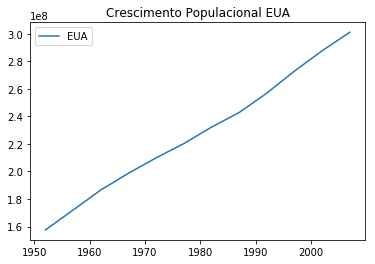

In [30]:
plt.plot(usa.year, usa.population)
plt.title('Crescimento Populacional EUA')
plt.legend(['EUA'])

Observe que utilizamos como eixo $x$ os valores do ano da população. Essa escolha faz sentido já que o crescimento populacional é afetado pelo tempo.

Agora gostaríamos de comparar o crescimento populacional dos Estados Unidos com o do Brasil. Para isso, criaremos uma tabela contendo somente as linhas cujo valor da coluna ```country``` seja igual a "Brazil". Adicionaremos um novo comando chamado ```plt.legend()``` no última linha. Esse comando é utilizado para acrescentar as legendas no gráfico.

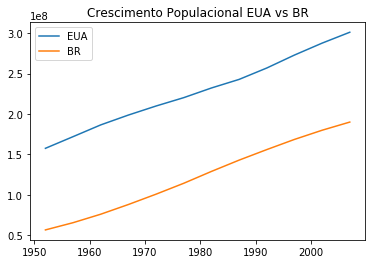

In [80]:
brazil = countries[countries.country == "Brazil"].copy()
plt.plot(usa.year, usa.population)
plt.plot(brazil.year, brazil.population)
plt.title('Crescimento Populacional EUA vs BR')
plt.legend(['EUA', 'BR'])

Analisando o gráfico acima é possível perceber que a população dos Estados Unidos foi maior que a população do Brasil em todos os períodos analisados. Além disso, observa-se um crescimento (aparentemente) linear das duas populações como a mesma taxa de crescimento.

Desejamos agora comparar o crescimento percentual das duas populações. Para isso precisaremos gerar uma nova coluna contendo o crescimento populacional para as duas tabelas.

O crecimento percentual é uma medida relativa que deve levar em conta uma referência. Nesse caso a referência é a população do primeiro ano registrado. O crescimento percentual, dessa forma, será calculado através da divisão de cada população pela população de referência.

Para obter o valor da primeira população utilizaremos a função ```DataFrame.iloc[linha, coluna]```. Por exemplo, o resultado da posição ```usa.iloc[0, o]``` retorna o valor "United States".

In [73]:
usa.iloc[0, 0]

'United States'

Como a coluna referente a população é a coluna 2, utilizamos a posição iloc[0, 2] para obter o valor desejado.

In [78]:
usa.iloc[0, 2]

157553000

Para gerar a nova coluna basta utilizar a notação ```DataFrame['nome_da_nova_coluna'] = ```. No exemplo, criaremos uma coluna chamada ```perc_population``` como sendo igual a coluna ```population``` dividida pelo valor de referência vezes 100.

In [81]:
usa['perc_population'] = usa.population / usa.iloc[0, 2] * 100
brazil['perc_population'] = brazil.population / brazil.iloc[0, 2] * 100

Finalmente podemos plotar os crescimentos percentuais.

Text(0, 0.5, 'crescimento %')

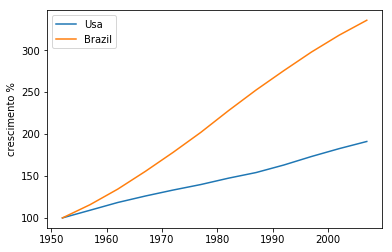

In [82]:
plt.plot(usa.year, usa.perc_population)
plt.plot(brazil.year, brazil.perc_population)
plt.legend(['Usa', 'Brazil'])
plt.ylabel('crescimento %')

Com o novo gráfico é possível verificar que o crescimento do Brasil é mais acelerado que o crescimento dos Estados Unidos.

Faremos mais um teste plotando o crescimento populacional dos Estados Unidos, Brasil, Argentina e Colômbia. Criaremos, primeiro, os dataframes ```ar```, representando a Argentina e ```col```, representando a Colômbia.

In [112]:
ar = countries[countries.country == 'Argentina'].copy()
col = countries[countries.country == 'Colombia'].copy()

Para plotar, utilizaremos o comando ```plt.plot()``` para cada país.

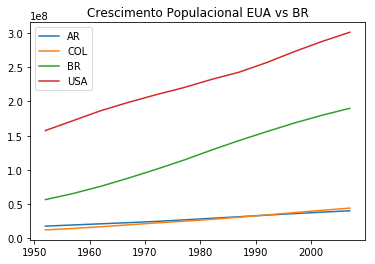

In [113]:
plt.plot(usa.year, ar.population)
plt.plot(usa.year, col.population)
plt.plot(usa.year, brazil.population)
plt.plot(brazil.year, usa.population)
plt.title('Crescimento Populacional EUA vs BR')
plt.legend(['AR', 'COL', 'BR', 'USA'])

Por conta da distância de valores, ficou difícil de visualizar o crescimento populacional da Argentina e Colômbia. Um artificio muito utilizado para diminuir a distância entre valores sem prejudicar a análise comparativa é a aplicação do logaritmo. Utilizaremos o pacote ```numpy``` para aplicar o logaritmo em todos os valores. Para importar o pacote utilizamos o comando abaixo.

In [108]:
import numpy as np

Para aplicar o logaritmo, utilizamos o comando ```np.log()```.

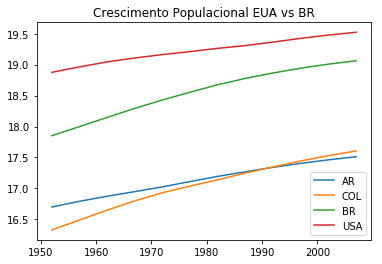

In [109]:
plt.plot(usa.year, np.log(ar.population))
plt.plot(usa.year, np.log(col.population))
plt.plot(usa.year, np.log(brazil.population))
plt.plot(brazil.year, np.log(usa.population))
plt.title('Crescimento Populacional EUA vs BR')
plt.legend(['AR', 'COL', 'BR', 'USA'])

Com a transformação é possível observar que a população da Colômbia era menor do que a população da Argentina até 1990, sendo superada pela última nos anos seguintes. 